# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Загрузка данных

Подключение библиотек

In [2]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

Загрузка данных

In [8]:
try:
    data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data=pd.read_csv('games.csv')

Просмотр первых строчек данных

In [9]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Информация о данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<b>Вывод :<b/>
    

1) Были импортированы библиотеки для дальнейшего исследования
    
2) Был загружен датасет '/datasets/games.csv'

- На первый взгляд сразу видно большое количество пропусков в данных. 

-  Названия столбцов находятся не в стиле 'Snake case'. 

- Некоторые столбцы не соответствуют нужному типу

## Шаг 2. Подготовка данных

### Замена названий столбцов (приведем в нижний регист название всех столбцов, кроме сокращения названий стран)

In [5]:
data=data.rename(columns={'Name':'name', 
                     'Platform':'platform', 
                     'Year_of_Release':'year_of_release', 
                     'Genre':'genre', 
                     'Other_sales':'other_sales', 
                     'Critic_Score':'critic_score', 
                     'User_Score':'user_score', 
                     'Rating':'rating'}
           )
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<b>Вывод :<b/>
- Названия большенства столбцов было изменено на 'змеиный регистр'
- Те которые не были изменены, относятся к сокращению стран.

### Изменение типов данных

Просмотр уникальных значений в столбце 'year_of_release' для дальнейшего изменения типа данных

In [6]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Замена пропущенных значений в столбце на '0'. Это решит проблему с ошибкой при изменении типа данных

In [7]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int16  
 3   genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int16(1), object(5)
memory usage: 1.4+ MB


Замена типа данных в столбце 'year_of_release'. Год выпуска игр целое число

In [8]:
data['year_of_release']=data['year_of_release'].astype(int)
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Проверка после изменений

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Просмотр уникальных значений в столбце 'critic_score' для дальнейшего изменения типа данных

In [10]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
data.loc[data['year_of_release']>2010].isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       2210
user_score         1641
rating             1708
dtype: int64

Замена пропущенных значений в столбце на '-1'. Это решит проблему с ошибкой при изменении типа данных

In [12]:
data['critic_score']=data['critic_score'].fillna(-1)

In [13]:
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,NaN,NaN


In [14]:
data['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Замена типа данных в столбце 'critic_score'. Рейтинг критиков целое число

In [15]:
data['critic_score']=data['critic_score'].astype(int)
data['critic_score'].unique()

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 41, 36, 31, 27, 35, 26, 19, 28, 23, 24, 21, 17, 13])

Проверка после изменений

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.5+ MB


Просмотр уникальных значений в столбце 'user_score' для дальнейшего изменения типа данных

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Замена пропущенных значений в столбце на '-1'. Это решит проблему с ошибкой при изменении типа данных

In [18]:
data['user_score']=data['user_score'].fillna(-1)
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В значениях столбика обнаружено 'tbd' и я посмотрел в интернетах этих ваших: 
- TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено) 

Значит можно поменять данное значение на -1:

In [19]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['user_score'].unique()
data.loc[data['user_score']==-1]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1,NaN


In [20]:
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1,NaN


Замена типа данных в столбце 'user_score'. Рейтинг игроков число с плавающей точкой

In [21]:
data['user_score']=data['user_score'].astype(float)

Просмотри информацию о данных

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16446 non-null  float64
 5   EU_sales         16446 non-null  float64
 6   JP_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Посмотрим уникальные значения столбца 'name' пред заменой типа данных, для дальнейшего заполнения пропусков в столбце 'year_of_release'. В  названии некоторых игр есть год релиза.

In [23]:
data.loc[data['year_of_release'] == 0, 'name'].unique()

array([], dtype=object)

Определим количество пропусков в столбце 'name'

In [24]:
data['name'].isnull().sum().sum()

2

Удаление пропусков в данных

In [25]:
data=data[data['name'].isnull()!=True]

Проверка удаления пропусков

In [26]:
data['name'].isnull().sum().sum()

0

Так и вот сейчас мне пришлось какой то кривой костылечек сделать для дальнейших действий. 

Была создана копия данных чтобы astype('string') корректно работал 

In [27]:
data_copy = data.copy()
data_copy['name'] = data_copy['name'].astype('string')

Просмотр результатов действий

In [28]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(3), string(1)
memory usage: 1.5+ MB


<b>Вывод :<b/>
    
Были изменены типы данных для удобства использования их в дальнейшей работе.

- Столбец 'name' заменен на тип 'string' (все значения были строками)
- Столбец 'year_of_release' заменен на тип 'int64' (все значения были целочисленными) 
- Столбец 'critic_score' заменен на тип 'int64' (все значения были целочисленными)
- Столбец 'user_score' заменен на тип 'float64' (в столбце были числа с плавающей точкой)


### Обработка пропусков в данных

Для дальнейшего удобства созданная копия данных была перенесена в оригинальную data

In [29]:
data=data_copy

Просмотр уникальных значений столбца 'name' , где год релиза пропущен. Нужно это для заполнения пропусков

In [31]:
data.loc[data['year_of_release'] == 0, 'name'].unique()

<StringArray>
[]
Length: 0, dtype: string

Заполнение пропусков, где название игры заканчивается годом. Берем эту дату и помещаем в колонку 'year_of_release'

In [32]:
year_mapping = {
    '2002': '2002',
    '2003': '2003',
    '2004': '2004',
    '2005': '2005',
    '2006': '2006',
    '2007': '2007',
    '2008': '2008',
    '2009': '2009',
    '2011': '2011',
    '2013': '2013',
    '20-03': '2003',
    '2K6': '2006',
    '2K8': '2008'
}

for name in data.loc[data['year_of_release'] == 0, 'name']:
    for key, value in year_mapping.items():
        if name.endswith(key):
            data.loc[data['name'] == name, 'year_of_release'] = value

Проверка выполненных действий

In [33]:
data.loc[data['year_of_release'] == 0]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


Оставшиеся пропуски придется удалить

In [34]:
data=data[data['year_of_release']!=0]

Проверка. 

'year_of_release' вернулся в 'object' и в шаге 3 я поменял снова.

In [35]:
data.loc[data['year_of_release'] == 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(3), string(1)
memory usage: 1.5+ MB


Просмотр уникальных значений в столбце 'rating'

In [36]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Просмотр пропусков в столбце 'rating'

In [37]:
data.loc[data['rating'].isnull()]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN


Просмотр уникальных значений в столбце 'genre'

In [38]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Создание сводной таблицы по столбцам 'genre' и 'rating' для просмотра всех оценок по жанрам игр

In [39]:
genre_data1 = data.groupby('genre')['rating'].value_counts().groupby('genre').head()
genre_data1

genre         rating
Action        T          670
              M          596
              E10+       468
              E          410
              AO           1
Adventure     E          159
              T          114
              M           98
              E10+        67
              EC           2
Fighting      T          357
              M           48
              E10+        19
              E            8
Misc          E          449
              T          228
              E10+       166
              M           13
              EC           5
Platform      E          354
              E10+       141
              T           63
              M            3
Puzzle        E          284
              E10+        42
              T           10
Racing        E          576
              T          167
              E10+        95
              M           18
Role-Playing  T          415
              M          161
              E10+       111
              E       

Вывод самой популярной оценки по всем жанрам игр

In [40]:
genre_data2 = data.groupby('genre')['rating'].value_counts().groupby('genre').head(1)
genre_data2

genre         rating
Action        T          670
Adventure     E          159
Fighting      T          357
Misc          E          449
Platform      E          354
Puzzle        E          284
Racing        E          576
Role-Playing  T          415
Shooter       M          553
Simulation    E          321
Sports        E         1162
Strategy      T          160
Name: rating, dtype: int64

Просмотр пропусков в столбце 'rating', где жанр игры 'Action'

In [41]:
data.loc[data['genre']=='Action', 'rating'].isnull().sum()

1161

Проверка на наличие пропусков по жанру 'Action'

In [43]:
data.loc[data['genre']=='Action', 'rating'].isnull().sum()

1161

Просмотр всех пропусков по столбцу 'rating'

In [44]:
data['rating'].isnull().sum()

6676

Просмотр информации о данных, чтобы убедиться в отсутствии пропусков

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(3), string(1)
memory usage: 1.5+ MB


Поиск и удаление дубликатов

In [47]:
data.drop_duplicates()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NaN


Проверка данных после удаления дубликатов

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  string 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(2), object(3), string(1)
memory usage: 1.5+ MB


Как показала информация, дубликаты не были обнаружены простым способом. Произведем поиск дубликатов по столбцу 'name' и добавим условие loc[lambda x: x > 1] это позволит исключить названия игр которые не повторяются

In [49]:
data['name'].value_counts().loc[lambda x: x > 1]

Need for Speed: Most Wanted                 12
Ratatouille                                  9
LEGO Marvel Super Heroes                     9
FIFA 14                                      9
Angry Birds Star Wars                        8
                                            ..
Naruto Shippuden: Ultimate Ninja Storm 4     2
Grand Theft Auto: Vice City                  2
Super Ghouls 'n Ghosts                       2
Escape The Museum                            2
Obscure: The Aftermath                       2
Name: name, Length: 2748, dtype: Int64

Просмотр игры с самым большим количеством названий которые встречаются в 'data'

In [50]:
data.loc[data['name']=='Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,-1,-1.0,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,-1,-1.0,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,-1,-1.0,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45,6.1,E


Как можно заметить игра выпускалась на многих платформах. Сгруппируем данные по столбцам 'platform' и 'name' и удалим дубликаты

In [51]:
duplicates_by_platform = data.groupby('platform')['name'].value_counts().loc[lambda x: x > 1]
for (platform, name) in duplicates_by_platform.index:
    data = data[~((data['platform'] == platform) & (data['name'] == name))]

Просмотр информации о данных после удаления дубликатов

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16438 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16438 non-null  string 
 1   platform         16438 non-null  object 
 2   year_of_release  16438 non-null  int64  
 3   genre            16438 non-null  object 
 4   NA_sales         16438 non-null  float64
 5   EU_sales         16438 non-null  float64
 6   JP_sales         16438 non-null  float64
 7   other_sales      16438 non-null  float64
 8   critic_score     16438 non-null  int64  
 9   user_score       16438 non-null  float64
 10  rating           9762 non-null   object 
dtypes: float64(5), int64(2), object(3), string(1)
memory usage: 1.5+ MB


Заполнение пропусков в столбцах о продажах медианными значениями.
Просмотр столбца 'NA_sales' где значение равно нулю.

In [54]:
data.loc[data['NA_sales']==0]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.0,0.00,4.87,0.00,-1,-1.0,NaN
340,Friend Collection,DS,2009,Misc,0.0,0.00,3.67,0.00,-1,-1.0,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.0,0.00,3.44,0.00,-1,-1.0,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.0,0.99,2.32,0.02,-1,-1.0,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.0,0.00,3.19,0.00,-1,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.00,0.00,0.00,-1,-1.0,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.00,0.01,0.00,-1,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.0,0.01,0.00,0.00,-1,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.00,0.01,0.00,-1,-1.0,NaN


Просмотр количества значений, чтобы понять сколько нулей содержаться в столбце

In [55]:
data['NA_sales'].value_counts()

0.00    4447
0.02     561
0.03     554
0.04     543
0.05     536
        ... 
4.46       1
4.74       1
4.40       1
4.12       1
5.05       1
Name: NA_sales, Length: 401, dtype: int64

Группировка по столбцам 'platform' и 'genre', сделано это было для того чтобы точнее определить медианную стоимость

In [56]:
Group_all=data.groupby(['platform', 'genre'])
Group_all.NA_sales.median()

platform  genre       
2600      Action          0.35
          Adventure       0.38
          Fighting        0.72
          Misc            0.81
          Platform        1.03
                          ... 
XOne      Role-Playing    0.21
          Shooter         0.63
          Simulation      0.07
          Sports          0.22
          Strategy        0.11
Name: NA_sales, Length: 293, dtype: float64

Замена значений '0' на 'NaN' для дальнейшего заполнения пропусков

In [57]:
data['NA_sales'] = data['NA_sales'].replace({0: np.nan})

Проверка после изменения 

In [59]:
data.loc[data['NA_sales']==0]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


Вывод количества уникальных значений для проверки

In [60]:
data['NA_sales'].value_counts()

0.02    561
0.03    554
0.04    543
0.05    536
0.01    530
       ... 
4.40      1
3.00      1
4.46      1
4.47      1
5.70      1
Name: NA_sales, Length: 400, dtype: int64

Вывод количества оставшихся пропусков в данном столбце

In [61]:
data['NA_sales'].isnull().sum()

4447

Проделаем все операции повторно для других столбцов.

Вывод количества значений

In [62]:
data['EU_sales'].value_counts()

0.00    5766
0.01    1466
0.02    1290
0.03     911
0.04     702
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: EU_sales, Length: 307, dtype: int64

Медианное значение

In [63]:
Group_all.EU_sales.median()

platform  genre       
2600      Action          0.020
          Adventure       0.020
          Fighting        0.040
          Misc            0.050
          Platform        0.060
                          ...  
XOne      Role-Playing    0.095
          Shooter         0.305
          Simulation      0.075
          Sports          0.060
          Strategy        0.040
Name: EU_sales, Length: 293, dtype: float64

In [66]:
data['EU_sales'].isnull().sum()

0

Вывод количества уникальных значений

In [67]:
data['JP_sales'].value_counts()

0.00    10296
0.02      732
0.01      696
0.03      540
0.04      391
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: JP_sales, Length: 244, dtype: int64

Медианне значения

In [68]:
Group_all.JP_sales.median()

platform  genre       
2600      Action          0.0
          Adventure       0.0
          Fighting        0.0
          Misc            0.0
          Platform        0.0
                         ... 
XOne      Role-Playing    0.0
          Shooter         0.0
          Simulation      0.0
          Sports          0.0
          Strategy        0.0
Name: JP_sales, Length: 293, dtype: float64

Вывод количества уникальных значений 

In [72]:
data['other_sales'].value_counts()

0.00    6491
0.01    3398
0.02    1595
0.03     910
0.04     640
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

Медианные значения

In [73]:
Group_all.other_sales.median()

platform  genre       
2600      Action          0.000
          Adventure       0.000
          Fighting        0.010
          Misc            0.010
          Platform        0.010
                          ...  
XOne      Role-Playing    0.030
          Shooter         0.100
          Simulation      0.015
          Sports          0.035
          Strategy        0.020
Name: other_sales, Length: 293, dtype: float64

Замена оставшихся пропусков на ноль и вывод результата

In [77]:
data=data.fillna(0)
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,0


Добавление столбца 'total_sales' и просмотр данных

In [78]:
data['total_sales'] = (data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['other_sales']) 
data.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,0,31.38


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16438 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16438 non-null  string 
 1   platform         16438 non-null  object 
 2   year_of_release  16438 non-null  int64  
 3   genre            16438 non-null  object 
 4   NA_sales         16438 non-null  float64
 5   EU_sales         16438 non-null  float64
 6   JP_sales         16438 non-null  float64
 7   other_sales      16438 non-null  float64
 8   critic_score     16438 non-null  int64  
 9   user_score       16438 non-null  float64
 10  rating           16438 non-null  object 
 11  total_sales      16438 non-null  float64
dtypes: float64(6), int64(2), object(3), string(1)
memory usage: 1.6+ MB


<b>Вывод :

Были заполнены пропуски и частично нулевые значения

- Заполнены пропуски столбца 'year_of_release', где названия игр заканчивались на год выхода игр.
- Остальные пропуски в данном столбце пришлось удалить.
- Заполнение пропусков в столбце 'rating' модой по жанрам игр.
- Были удалены все дубликаты по столбцу 'name'.
- Были частично заполнены все столбцы с продажами медианой, методом группировки по столбцам 'platform' и 'genre'.</b>

Пропуски в оценке игры могут быть вызваны различными факторами, такими как: отсутствие систематического опроса для оценки игры, низкая популярность игры, из-за чего она не была подвергнута общественной оценке, технические ошибки или другие проблемы, связанные с процессом сбора и обработки данных.

Пропуски в данных могут быть результатом ошибок, возникающих на этапе сбора информации, а также технических сложностей, связанных с передачей или хранением данных. Это может включать в себя некорректное функционирование системы сбора данных, проблемы с сетевым соединением или ошибки в процессе хранения и обработки информации

## Шаг 3. Исследовательский анализ данных

1) Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

2) Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

3) Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

4) Не учитывайте в работе данные за предыдущие годы.

5) Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

6) Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

7) Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

8) Соотнесите выводы с продажами игр на других платформах.

9) Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Год выпуска вернулся в object и я решил поменять тут а не раньше (на всякий случай чтобы не сломать что то)

In [82]:
#data=data.loc[data['user_score']!=-1]
data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,0,0.01


<b> Вопрос 1</b>
Создание сводной таблицы для того чтобы посчитать количество игр выпущенных за года.

In [85]:
data_pivot_table1 = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
data_pivot_table1.columns = ['count']
data_pivot_table1=data_pivot_table1.sort_values(by='year_of_release')
data_pivot_table1

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Построение графика для наглядности, по данным полученным в предыдущем блоке.

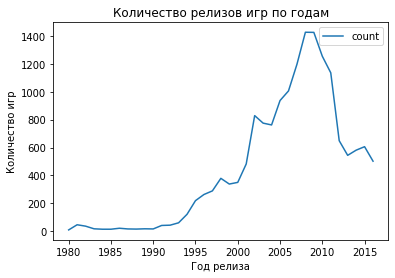

In [86]:
data_pivot_table1.plot()
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.title('Количество релизов игр по годам')
plt.show()

<b>Вывод : </b>

Данные по всем периодам не важны

1. С 1980 по 1990 год: Видно, что в этом периоде выходило мало игр. Это может быть связано с тем, что в это время компьютерные игры были не так распространены, а также с тем, что технические возможности были ограничены.
2. С 1995 года по 2005 год: Видно, что в этом периоде игры выходили чаще, чем в предыдущем периоде. Это может быть связано с тем, что технические возможности стали более развитыми и доступными для создания компьютерных игр.
3. Пик компьютерных игр пришелся на 2008 год важным фактором, было появление новых технологий и улучшения технических возможностей.
4. Спад игр выпал на 2009 по 2015 год: После пика в 2008 году начался спад выпуска компьютерных игр. Это может быть связано с тем, что потребители перестали покупать новые игры или с тем, что технические возможности уже не были так сильно развиты, чтобы продолжать выпускать новые игры.

<b>Вопрос 2</b>
Построение сводной таблицы, которая показывает общую сумму продаж для каждой платформы

In [87]:
data_pivot_table2 = pd.pivot_table(data, index=['platform'], values='total_sales', aggfunc='sum')
data_pivot_table2.columns = ['count']
data_pivot_table2 = data_pivot_table2.sort_values(by='count', ascending=False)
data_pivot_table2

,count
platform,
PS2,1233.56
X360,958.43
PS3,928.77
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построение графика, для суммарных продаж для платформ (топ 10)

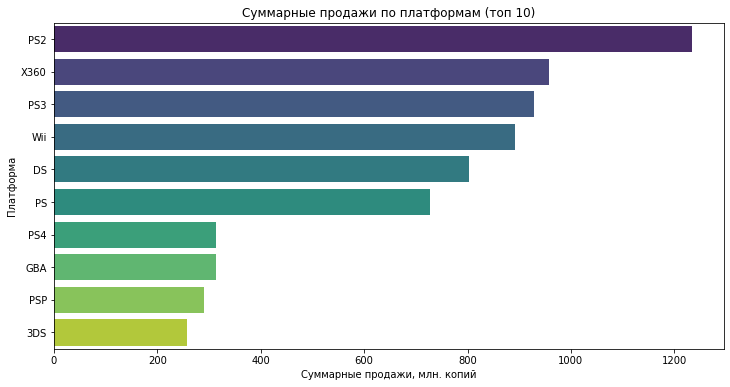

In [88]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='viridis')
plt.title('Суммарные продажи по платформам (топ 10)')
plt.xlabel('Суммарные продажи, млн. копий')
plt.ylabel('Платформа')
plt.show()

Построим сводную таблицу, которая показывает общую сумму продаж для каждой платформы в каждом году

In [89]:
platforms_sales = pd.pivot_table(data, index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platforms_sales

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Получение списка всех лет, за которые были созданы игры

In [90]:
all_years = platforms_sales.sum().nlargest(100).index
all_years

Int64Index([2008, 2009, 2007, 2010, 2006, 2011, 2005, 2004, 2002, 2013, 2003,
            2012, 2014, 2001, 2015, 1998, 1999, 2000, 1997, 1996, 2016, 1995,
            1994, 1992, 1989, 1985, 1984, 1990, 1988, 1993, 1986, 1981, 1991,
            1982, 1987, 1983, 1980],
           dtype='int64', name='year_of_release')

Построим график, для того чтобы визуализировать продажи видеоигр по годам

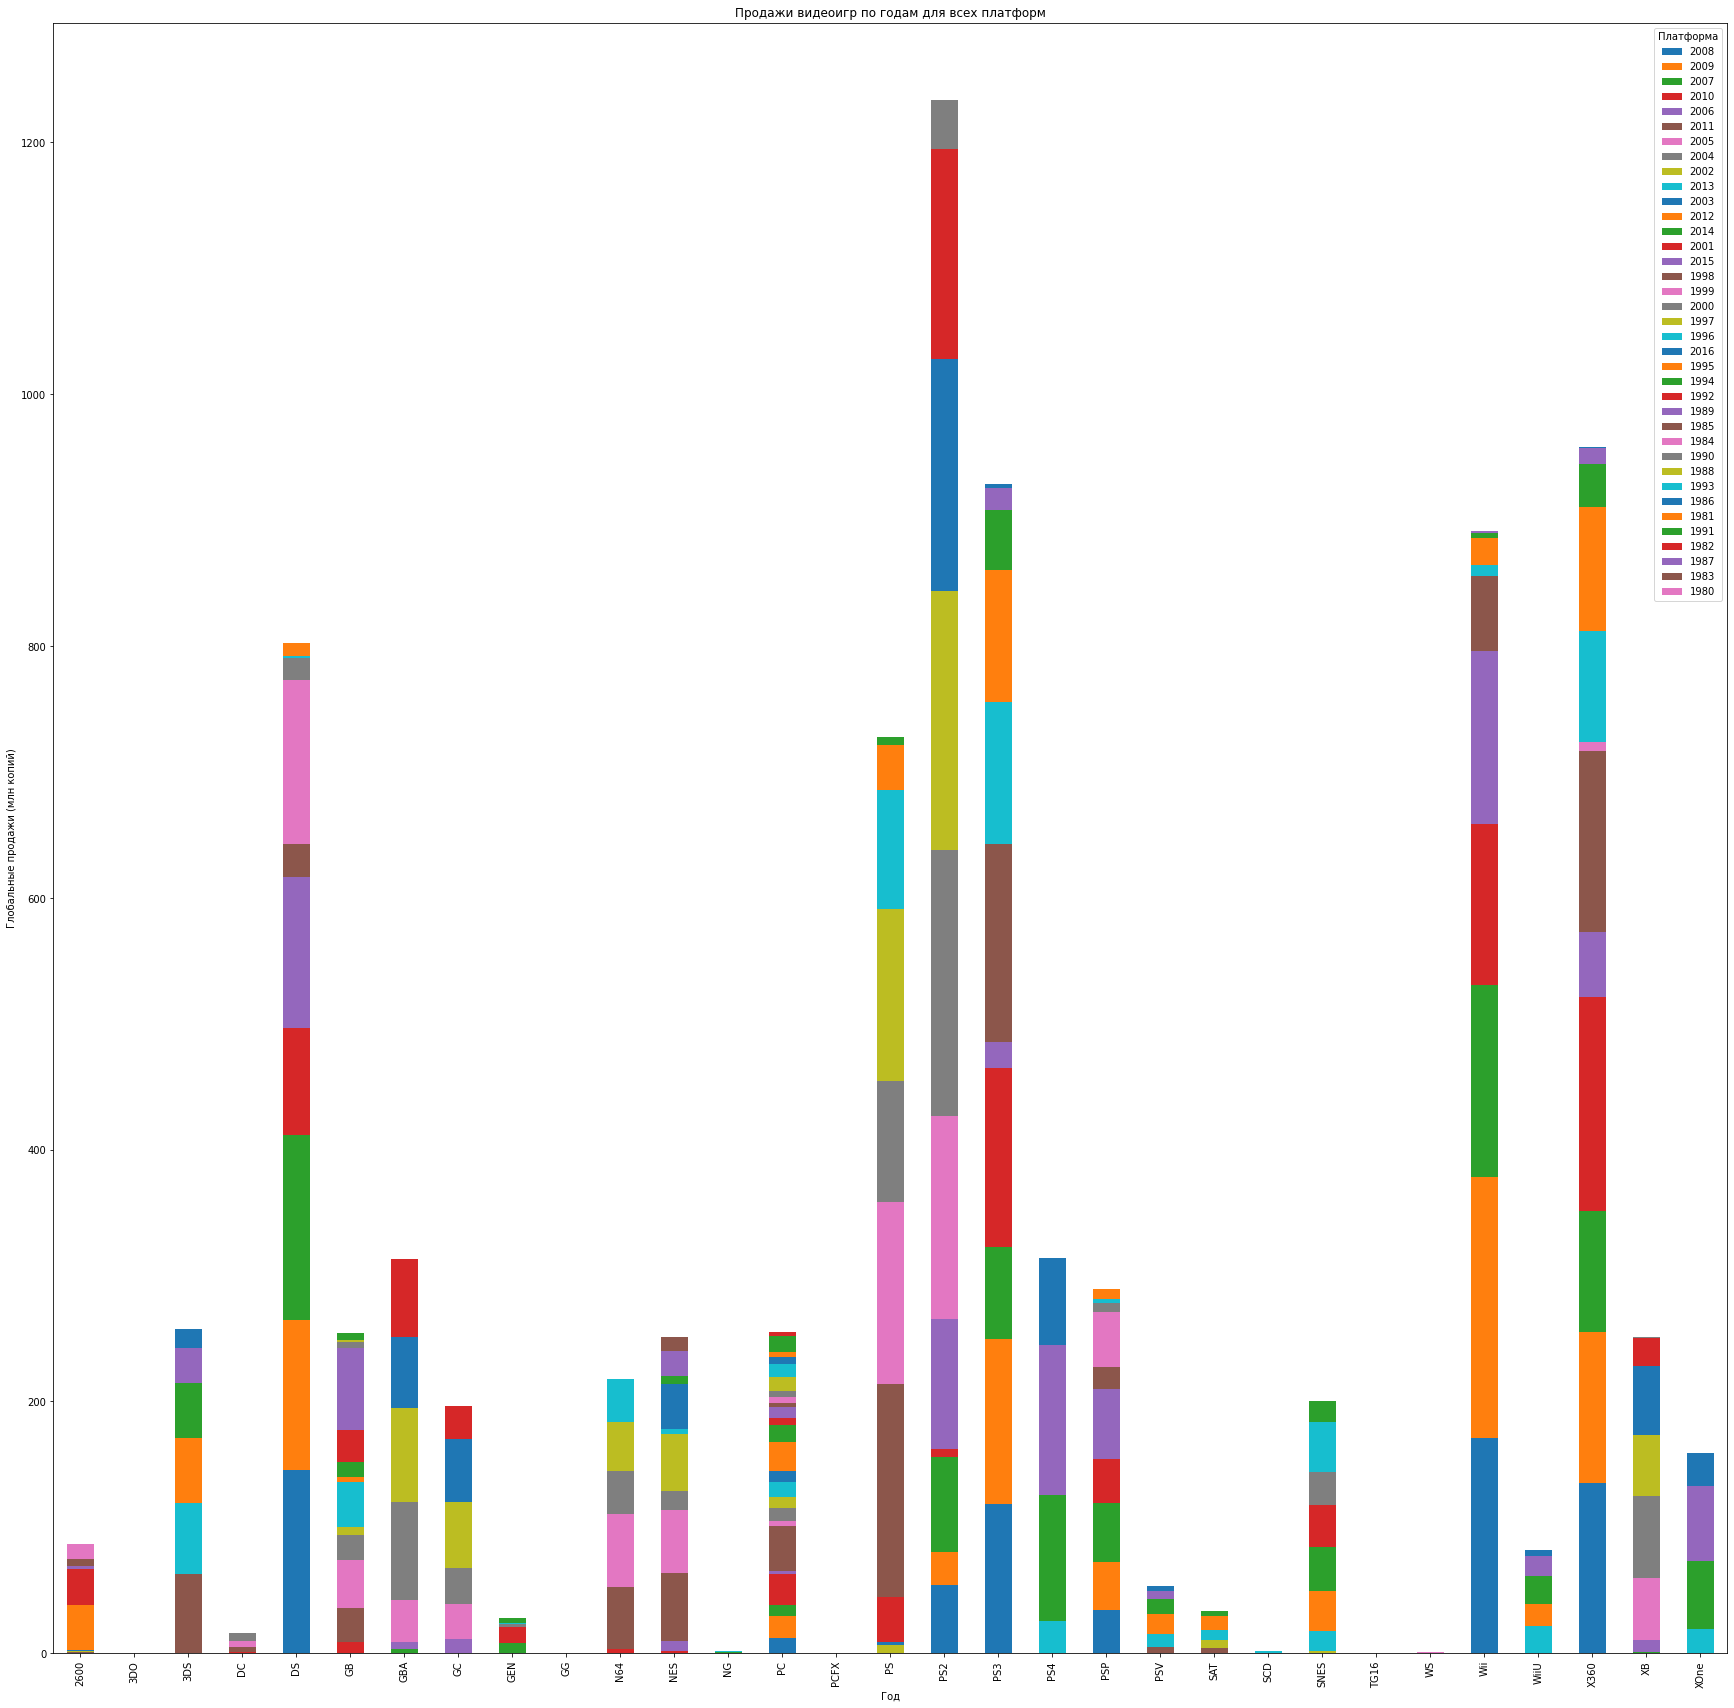

In [91]:
platforms_sales[all_years].plot(kind='bar', stacked=True, figsize=(30, 30))
plt.title('Продажи видеоигр по годам для всех платформ')
plt.xlabel('Год')
plt.ylabel('Глобальные продажи (млн копий)')
plt.legend(title='Платформа')
plt.show()

Создание сводной таблицы продаж для каждой из популярных платформ

In [94]:
best_sales_platforms = ['PS2', 'X360', 'DS', 'Wii', 'PS3']
platform_sales_summary = pd.DataFrame()

for platform in best_sales_platforms:
    platform_data = data[data['platform'] == platform]
    platform_sales_pivot_table = pd.pivot_table(platform_data, index='year_of_release', values='total_sales', aggfunc='sum')
    platform_sales_pivot_table['platform'] = platform
    platform_sales_summary = platform_sales_summary.append(platform_sales_pivot_table)
platform_sales_summary.reset_index(inplace=True)

print(platform_sales_summary)

    year_of_release  total_sales platform
0              2000        39.17      PS2
1              2001       166.43      PS2
2              2002       205.38      PS2
3              2003       184.31      PS2
4              2004       211.81      PS2
5              2005       160.66      PS2
6              2006       103.42      PS2
7              2007        75.99      PS2
8              2008        53.90      PS2
9              2009        26.40      PS2
10             2010         5.64      PS2
11             2011         0.45      PS2
12             2005         7.00     X360
13             2006        51.62     X360
14             2007        95.41     X360
15             2008       135.26     X360
16             2009       120.29     X360
17             2010       170.03     X360
18             2011       143.84     X360
19             2012        98.18     X360
20             2013        88.58     X360
21             2014        34.74     X360
22             2015        11.96  

<b>Вывод :</b>
1) Наибольшими суммарными продажами обладают следующие игровые платформы:  PS2, X360, DS, Wii и PS3. 

2) Для платформ, как видно, срок использования составляет от 10 до 12 лет.

<b>Вопрос 3 и 4</b> Актуальный период, предположительно последние 5 лет которые е|сть в данных, соответственно 2011-2016 года.

Создание нового датафрейма, где год релиза 2013-2016

In [96]:
data_new=data.query('year_of_release > 2012')

Просмотр новых данных

In [97]:
data_new

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01


Информация о новых данных

In [98]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   string 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   NA_sales         2233 non-null   float64
 5   EU_sales         2233 non-null   float64
 6   JP_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   int64  
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(6), int64(2), object(3), string(1)
memory usage: 226.8+ KB


<b>Вопрос 5</b>

Создадим таблицу суммарных продажи за каждый год по разным платформам

In [99]:
platform_all = data_new.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_all

,platform,year_of_release,total_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


Таблица с суммарным доходом за все время для разных платформ

In [100]:
platform_sales = data_new.groupby('platform')['total_sales'].sum().reset_index()
platform_sales_sorted = platform_sales.sort_values('total_sales', ascending=False)
platform_sales_sorted

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


<b>Вывод :</b>
1) Топ 5 игровых за актуальное время по всему миру: PS3, X360, 3DS, PS4, XOne.

2) Наблюдается рост продаж для следующих платформ: PS4, XOne, 3DS, WiiU и PSV. Это объясняется тем, что они заменяют предыдущее поколение игровых консолей.

3) Продажи предыдущего поколения консолей, таких как PS3, X360, DS, Wii и PSP, уменьшаются

<b>Вопрос 6</b>

Построение 'ящика с усами' для прибыли по всем платформам

In [101]:
#data_new.boxplot(column = 'total_sales')
#plt.title('all')

'ящика с усами' для PS3

In [102]:
#data_new.loc[data_new['platform']=='PS3'].boxplot(column = 'total_sales')
#plt.title('PS3')

'ящика с усами' для X360

In [103]:
#data_new.loc[data_new['platform']=='X360'].boxplot(column = 'total_sales')
#plt.title('X360')

'ящика с усами' для 3DS

In [104]:
#data_new.loc[data_new['platform']=='3DS'].boxplot(column = 'total_sales')
#plt.title('3DS')

'ящика с усами' для PS4

In [105]:
#data_new.loc[data_new['platform']=='PS4'].boxplot(column = 'total_sales')
#plt.title('PS4')

'ящика с усами' для XOne

In [106]:
#data_new.loc[data_new['platform']=='XOne'].boxplot(column = 'total_sales')
#plt.title('XOne')

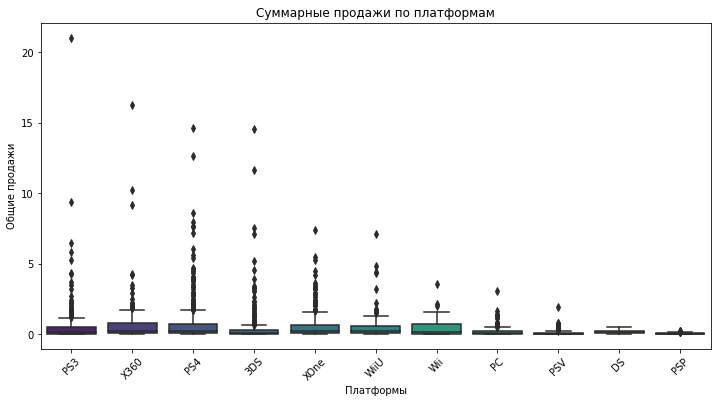

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_new, x='platform', y='total_sales', palette='viridis')
plt.title('Суммарные продажи по платформам')
plt.xticks(rotation=45)
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.show()

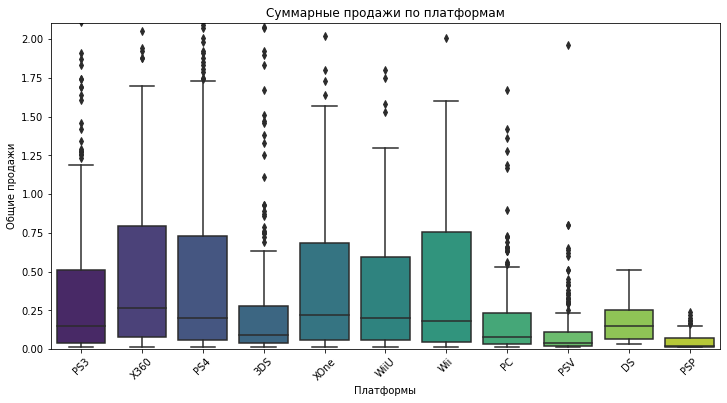

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_new, x='platform', y='total_sales', palette='viridis')
plt.title('Суммарные продажи по платформам')
plt.xticks(rotation=45)
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
y_max = data_new['total_sales'].max() * 0.10
plt.ylim(0, y_max)
plt.show()

<b>Вывод :</b>

Различия в продажах игр между платформами существенны. Некоторые  игры продаются долгое время, но таких мало.

У платформ PS4, PS3 и 3DS продажи растут. Средние значения продаж на этих платформах превышают третий квантиль, что указывает на то, что на PS4, PS3 и 3DS выходят более популярные и продаваемые игры по сравнению с XOne и X360.

<b>Вопрос 7</b>

Выберем для диаграмм рассеивания самую популярную платформу 'PS3'

In [109]:
one_platform=data_new.loc[data_new['platform']=='PS3']

In [110]:
one_platform1=one_platform.loc[one_platform['user_score']>=0]

In [111]:
one_platform1

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.1,M,5.86
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,-1,4.8,M,4.36
...,...,...,...,...,...,...,...,...,...,...,...,...
15416,The Awakened Fate Ultimatum,PS3,2014,Role-Playing,0.00,0.00,0.02,0.00,65,7.3,T,0.02
15418,Xblaze: Lost Memories,PS3,2015,Adventure,0.02,0.00,0.00,0.00,63,6.2,M,0.02
15533,Battle Princess of Arcadias,PS3,2013,Role-Playing,0.00,0.00,0.02,0.00,69,7.9,T,0.02
15742,Invizimals: The Lost Kingdom,PS3,2013,Action,0.00,0.02,0.00,0.00,50,5.0,E10+,0.02


Построим диаграмму рассеяния для оценок пользователей и суммарных продаж

Text(0, 0.5, 'Суммарные продажи')

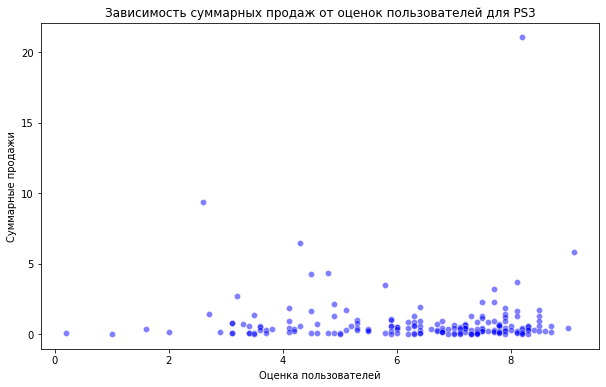

In [112]:
one_platform1 = one_platform1.dropna(subset=['user_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=one_platform1, x='user_score', y='total_sales', color='blue', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок пользователей для PS3')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')

Построим диаграмму рассеяния для оценок критиков и суммарных продаж

In [113]:
one_platform2=one_platform.loc[one_platform['critic_score']>=0]

In [114]:
one_platform2

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.1,M,5.86
337,Assassin's Creed IV: Black Flag,PS3,2013,Action,1.33,1.68,0.13,0.57,88,8.1,M,3.71
...,...,...,...,...,...,...,...,...,...,...,...,...
15418,Xblaze: Lost Memories,PS3,2015,Adventure,0.02,0.00,0.00,0.00,63,6.2,M,0.02
15533,Battle Princess of Arcadias,PS3,2013,Role-Playing,0.00,0.00,0.02,0.00,69,7.9,T,0.02
15742,Invizimals: The Lost Kingdom,PS3,2013,Action,0.00,0.02,0.00,0.00,50,5.0,E10+,0.02
15880,Turbo: Super Stunt Squad,PS3,2013,Sports,0.00,0.01,0.00,0.00,38,-1.0,E,0.01


Text(0, 0.5, 'Суммарные продажи')

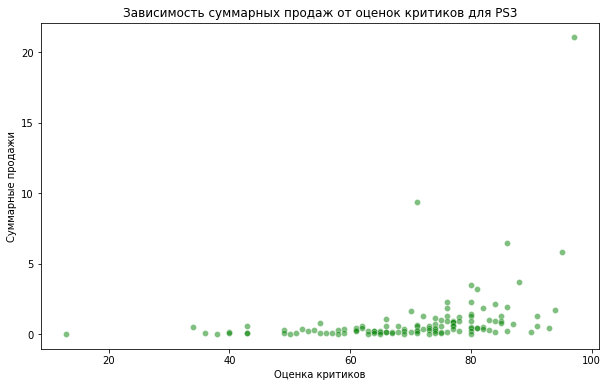

In [115]:
one_platform2 = one_platform2.dropna(subset=['critic_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=one_platform2, x='critic_score', y='total_sales', color='green', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок критиков для PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')

Создадим датафрейм с отзывами критиков, игроков и прибылью

In [116]:
df1=pd.DataFrame(one_platform, columns=['total_sales', 'user_score', 'critic_score'])
df1

,total_sales,user_score,critic_score
16,21.05,8.2,97
69,9.36,2.6,71
126,6.46,4.3,86
149,5.86,9.1,95
180,5.27,-1.0,-1
...,...,...,...
16558,0.01,-1.0,-1
16638,0.01,-1.0,-1
16674,0.01,-1.0,-1
16691,0.01,-1.0,-1


In [117]:
df1.loc[df1['critic_score'] >= 0, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.334285
total_sales,0.334285,1.000000


In [118]:
df1.loc[df1['user_score'] >= 0, ['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.002394
total_sales,0.002394,1.000000


<b>Вывод : </b>

Можно сделать вывод по матрице корреляции, что оценки критиков и отзывы игроков не имеют большое влияние на суммарные продажи игр. Но как можно заметить отзывы критиков и отзывы между ссобой взаимосвязанны

<b>Вопрос 8</b>

Проделаем аналогичный анализ для других платформ и сравним выводы

Выберем для диаграмм рассеивания самую популярную платформу 'X360'

In [123]:
second_platform=data_new.loc[data['platform']=='X360']

In [124]:
second_platform1=second_platform.loc[second_platform['user_score']>=0]

Построим диаграмму рассеяния для оценок пользователей и суммарных продаж

Text(0, 0.5, 'Суммарные продажи')

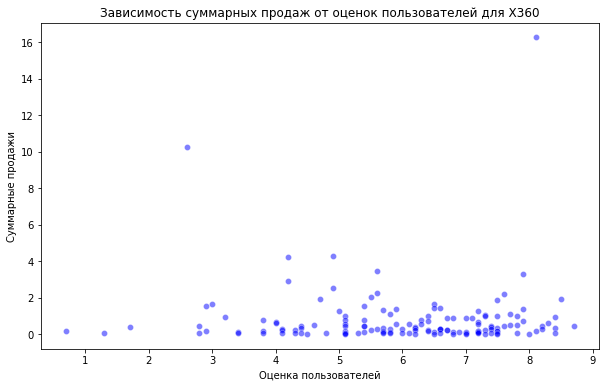

In [125]:
second_platform1 = second_platform1.dropna(subset=['user_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=second_platform1, x='user_score', y='total_sales', color='blue', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок пользователей для X360')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')

Построим диаграмму рассеяния для оценок критиков и суммарных продаж

In [126]:
second_platform2=second_platform.loc[second_platform['critic_score']>=0]

Text(0, 0.5, 'Суммарные продажи')

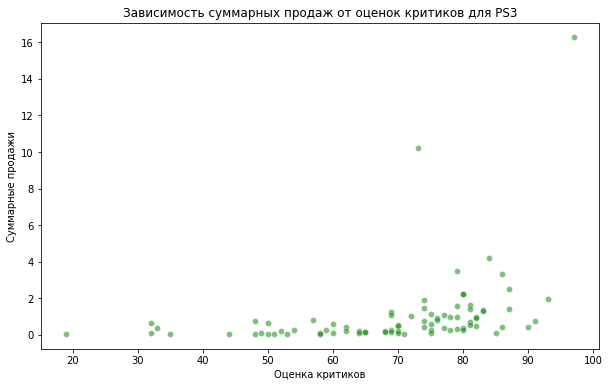

In [127]:
second_platform2 = second_platform2.dropna(subset=['critic_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=second_platform2, x='critic_score', y='total_sales', color='green', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок критиков для PS3')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')

Создадим датафрейм с отзывами критиков, игроков и прибылью

In [128]:
df2=pd.DataFrame(second_platform, columns=['total_sales', 'user_score', 'critic_score'])
df2

,total_sales,user_score,critic_score
23,16.27,8.1,97
60,10.24,2.6,73
72,9.18,-1.0,-1
263,4.28,4.9,-1
271,4.22,4.2,84
...,...,...,...
16301,0.01,-1.0,-1
16450,0.01,4.5,-1
16460,0.01,6.2,-1
16491,0.01,-1.0,-1


In [129]:
df2.loc[df2['user_score'] >= 0, ['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.011742
total_sales,-0.011742,1.000000


In [130]:
df2.loc[df2['critic_score'] >= 0, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.350345
total_sales,0.350345,1.000000


Выберем для диаграмм рассеивания самую популярную платформу '3DS'

In [134]:
third_platform=data_new.loc[data['platform']=='3DS']
third_platform1=third_platform.loc[third_platform['user_score']>=0]

Построим диаграмму рассеяния для оценок пользователей и суммарных продаж

Text(0, 0.5, 'Суммарные продажи')

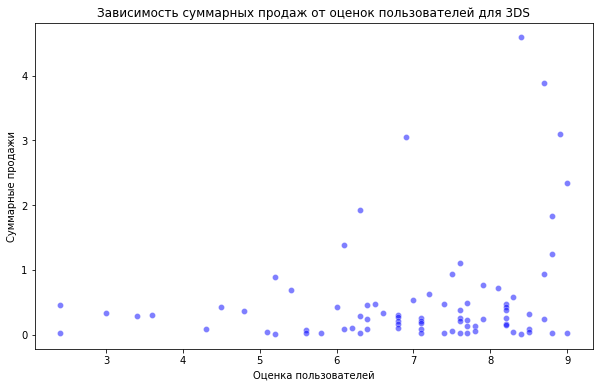

In [135]:
third_platform1 = third_platform1.dropna(subset=['user_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=third_platform1, x='user_score', y='total_sales', color='blue', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок пользователей для 3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')

Построим диаграмму рассеяния для оценок критиков и суммарных продаж

In [136]:
third_platform2=third_platform.loc[third_platform['critic_score']>=0]

Text(0, 0.5, 'Суммарные продажи')

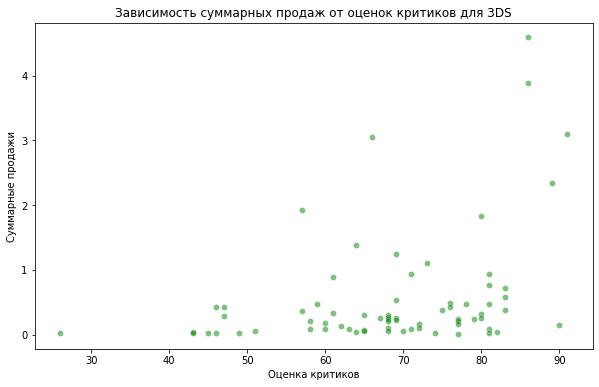

In [137]:
third_platform2 = third_platform2.dropna(subset=['critic_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=third_platform2, x='critic_score', y='total_sales', color='green', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок критиков для 3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')

Создадим датафрейм с отзывами критиков, игроков и прибылью

In [138]:
df3=pd.DataFrame(third_platform, columns=['total_sales', 'user_score', 'critic_score'])
df3

,total_sales,user_score,critic_score
33,14.60,-1.0,-1
47,11.68,-1.0,-1
96,7.55,-1.0,-1
108,7.14,-1.0,-1
184,5.22,-1.0,-1
...,...,...,...
16608,0.01,-1.0,-1
16610,0.01,-1.0,-1
16648,0.01,-1.0,-1
16668,0.01,-1.0,-1


In [139]:
df3.loc[df3['user_score'] >= 0, ['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.241504
total_sales,0.241504,1.000000


In [140]:
df3.loc[df3['critic_score'] >= 0, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.357057
total_sales,0.357057,1.000000


In [143]:
fourth_platform=data_new.loc[data['platform']=='PS4']
fourth_platform1=fourth_platform.loc[fourth_platform['user_score']>=0]

Text(0, 0.5, 'Суммарные продажи')

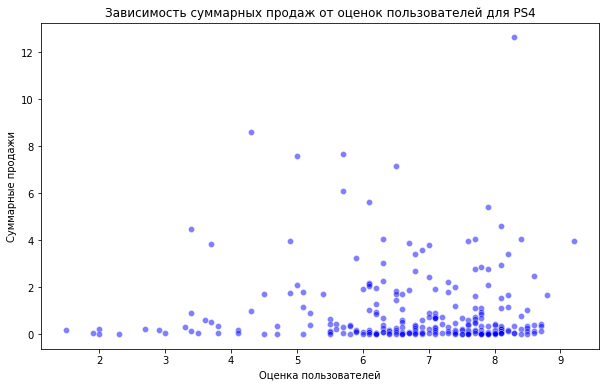

In [144]:
fourth_platform1 = fourth_platform1.dropna(subset=['user_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fourth_platform1, x='user_score', y='total_sales', color='blue', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок пользователей для PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')

In [145]:
fourth_platform2=fourth_platform.loc[fourth_platform['critic_score']>=0]

Text(0, 0.5, 'Суммарные продажи')

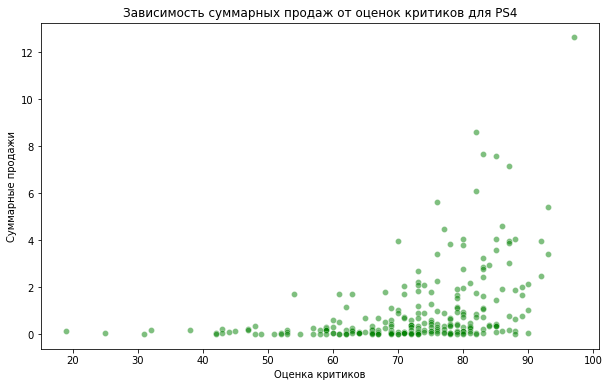

In [146]:
fourth_platform2 =fourth_platform2.dropna(subset=['critic_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fourth_platform2, x='critic_score', y='total_sales', color='green', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок критиков для PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')

In [147]:
df4=pd.DataFrame(fourth_platform, columns=['total_sales', 'user_score', 'critic_score'])
df4

,total_sales,user_score,critic_score
31,14.63,-1.0,-1
42,12.62,8.3,97
77,8.58,4.3,82
87,7.98,-1.0,-1
92,7.66,5.7,83
...,...,...,...
16500,0.01,7.5,69
16503,0.01,-1.0,-1
16526,0.01,7.9,61
16530,0.01,5.5,51


In [148]:
df4.loc[df4['user_score'] >= 0, ['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


In [149]:
df4.loc[df4['critic_score'] >= 0, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


In [151]:
fifth_platform=data_new.loc[data['platform']=='XOne']
fifth_platform1=fifth_platform.loc[fifth_platform['user_score']>=0]

Text(0, 0.5, 'Суммарные продажи')

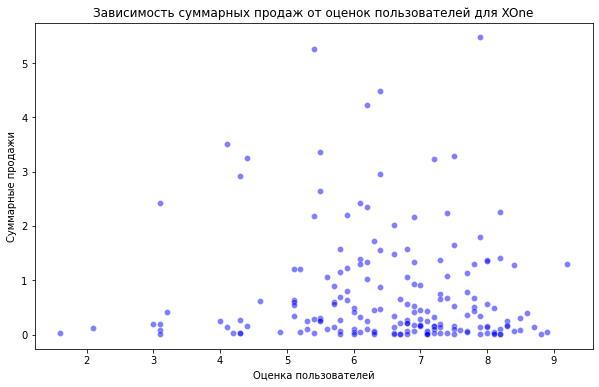

In [152]:
fifth_platform1 = fifth_platform1.dropna(subset=['user_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fifth_platform1, x='user_score', y='total_sales', color='blue', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок пользователей для XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')

In [153]:
fifth_platform2=fifth_platform.loc[fifth_platform['critic_score']>=0]

Text(0, 0.5, 'Суммарные продажи')

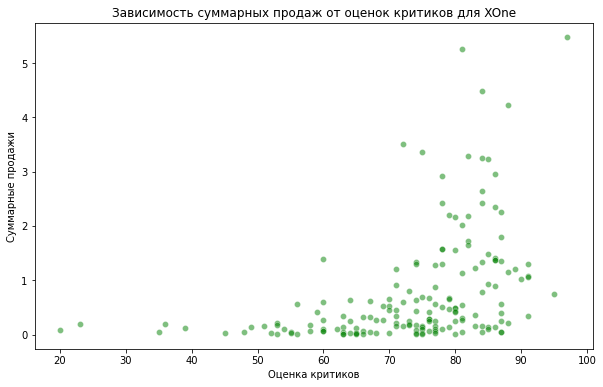

In [154]:
fifth_platform2 =fifth_platform2.dropna(subset=['critic_score', 'total_sales'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fifth_platform2, x='critic_score', y='total_sales', color='green', alpha=0.5)
plt.title('Зависимость суммарных продаж от оценок критиков для XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')

In [155]:
df5=pd.DataFrame(fifth_platform, columns=['total_sales', 'user_score', 'critic_score'])
df5

,total_sales,user_score,critic_score
99,7.39,-1.0,-1
165,5.47,7.9,97
179,5.26,5.4,81
242,4.49,6.4,84
270,4.22,6.2,88
...,...,...,...
16630,0.01,8.2,63
16643,0.01,6.6,-1
16645,0.01,-1.0,-1
16660,0.01,6.7,74


In [156]:
df5.loc[df5['user_score'] >= 0, ['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.068925
total_sales,-0.068925,1.000000


In [157]:
df5.loc[df5['critic_score'] >= 0, ['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


<b>Вывод :</b>

Результаты продаж игр на платформах X360 и 3DS демонстрируют схожие тенденции. Кроме того, анализ показывает, что оценки критиков и мнения игроков оказывают незначительное влияние на общие продажи игр. В то же время, наблюдается высокая корреляция между оценками критиков и отзывами пользователей, что может указывать на общие предпочтения и критерии оценки качества игр в сообществе игроков и среди профессиональных рецензентов.

<b>Вопрос 8</b>

Считаем количество прибыли в каждом жанре

In [159]:
genre_counts = pd.pivot_table(data_new, index='genre', values='total_sales', aggfunc='sum')
genre_counts = genre_counts.sort_values('total_sales', ascending=True)
genre_counts

,total_sales
genre,
Puzzle,3.17
Strategy,10.08
Simulation,21.76
Adventure,23.64
Fighting,35.31
Racing,39.89
Platform,42.63
Misc,62.82
Role-Playing,145.89


Построим столбчатую диаграмму

Text(0, 0.5, 'Мировые продажи')

<Figure size 864x432 with 0 Axes>

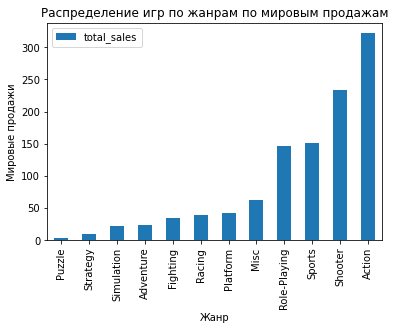

In [160]:
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Распределение игр по жанрам по мировым продажам')
plt.xlabel('Жанр')
plt.ylabel('Мировые продажи')

In [161]:
genre_counts1 = pd.pivot_table(data_new, index='genre', values='total_sales', aggfunc='median')
genre_counts1 = genre_counts1.sort_values('total_sales', ascending=True)
genre_counts1

,total_sales
genre,
Adventure,0.030
Puzzle,0.060
Strategy,0.080
Misc,0.100
Simulation,0.100
Action,0.110
Racing,0.120
Fighting,0.125
Role-Playing,0.125


Text(0, 0.5, 'Мировые продажи')

<Figure size 864x432 with 0 Axes>

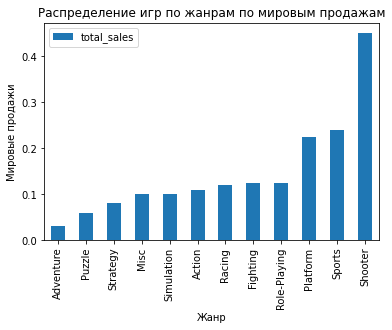

In [162]:
plt.figure(figsize=(12, 6))
genre_counts1.plot(kind='bar')
plt.title('Распределение игр по жанрам по мировым продажам')
plt.xlabel('Жанр')
plt.ylabel('Мировые продажи')

In [163]:
genre_counts1 = genre_counts1.reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

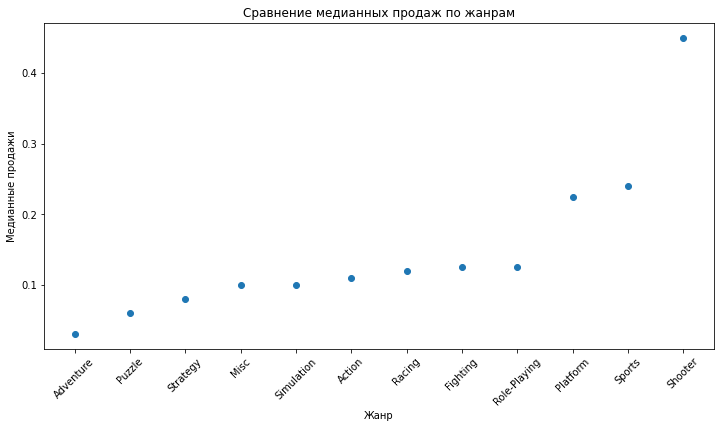

In [164]:
plt.figure(figsize=(12, 6))
plt.scatter(genre_counts1['genre'], genre_counts1['total_sales'])
plt.title('Сравнение медианных продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медианные продажи')
plt.xticks(rotation=45)

<b>Вывод :</b>

Самыми прибыльными жанрами можно считать Shooter, Sports, Platform Role-Playing и Fighting.

## Шаг 4. Составление портрета пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Таблица для игроков в Северной Америке

In [166]:
na_data = data_new.query('NA_sales > 0')
na_data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01
16553,Farming Simulator 2014,PSV,2014,Simulation,0.01,0.00,0.00,0.00,-1,-1.0,0,0.01
16618,Xblaze: Lost Memories,PSV,2015,Adventure,0.01,0.00,0.00,0.00,-1,7.0,M,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,0,0.01


Таблица для игроков в Европе 

In [167]:
eu_data = data_new.query('EU_sales > 0')
eu_data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,-1,-1.0,0,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,-1,5.1,E10+,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,-1,-1.0,0,0.01


Таблица для игроков в Японии 

In [168]:
jp_data = data_new.query('JP_sales > 0')
jp_data

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,0,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,0,0.01


Популярность платворм в Северной Америке

In [169]:
na_pivot_table = pd.pivot_table(na_data, index='platform', values='NA_sales',
                                        aggfunc='sum').sort_values('NA_sales', ascending=False)
na_pivot_table.head()

,NA_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


Популярность платворм в Европе

In [170]:
eu_pivot_table = pd.pivot_table(eu_data, index='platform', values='EU_sales',
                                        aggfunc='sum').sort_values('EU_sales', ascending=False)
eu_pivot_table.head()

,EU_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


Популярность платворм в Японии

In [171]:
jp_pivot_table = pd.pivot_table(jp_data, index='platform', values='JP_sales',
                                        aggfunc='sum').sort_values('JP_sales', ascending=False)
jp_pivot_table.head()

,JP_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


<b>Вывод :</b>
- Топ 5 по Северной Америке: X360, PS3, PS4, 3DS, XOne
- Топ 5 по Европейскому региону: PS3, PS4, X360, 3DS, PC
- Топ 5 по Японии: 3DS, PS3, PSP, PSV, PS4

Можно предположить, что влияние на популярность платформ в разных регионах, обусловлена монополией, в первую очередь по стране и миру кампании.

Проделаем подобную работу только по столбцу 'genre'

Популярность жанров в Северной Америке

In [172]:
na_pivot_table = pd.pivot_table(na_data, index='genre', values='NA_sales',
                                        aggfunc='sum').sort_values('NA_sales', ascending=False)
na_pivot_table.head()

,NA_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Популярность жанров в Европе 

In [173]:
eu_pivot_table = pd.pivot_table(eu_data, index='genre', values='EU_sales',
                                        aggfunc='sum').sort_values('EU_sales', ascending=False)
eu_pivot_table.head()

,EU_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


Популярность жанров в Японии 

In [174]:
jp_pivot_table = pd.pivot_table(jp_data, index='genre', values='JP_sales',
                                        aggfunc='sum').sort_values('JP_sales', ascending=False)
jp_pivot_table.head()

,JP_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


<b>Вывод :</b>
- Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing, Misc
- Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing, Misc
- Топ 5 по Японии: Action, Role-Playing, Misc, Sports, Shooter

Проделаем подобную работу только по столбцу 'rating'

Влияние рейтинга в Северной Америке

In [175]:
na_pivot_table = pd.pivot_table(na_data, index='rating', values='NA_sales',
                                        aggfunc='sum').sort_values('NA_sales', ascending=False)
na_pivot_table.head()

,NA_sales
rating,
M,165.21
0,89.42
E,79.05
E10+,54.24
T,49.79


Влияние рейтинга в Европе

In [176]:
eu_pivot_table = pd.pivot_table(eu_data, index='rating', values='EU_sales',
                                        aggfunc='sum').sort_values('EU_sales', ascending=False)
eu_pivot_table.head()

,EU_sales
rating,
M,145.32
E,83.36
0,78.91
E10+,42.69
T,41.95


Влияние рейтинга в Японии

In [177]:
jp_pivot_table = pd.pivot_table(jp_data, index='rating', values='JP_sales',
                                        aggfunc='sum').sort_values('JP_sales', ascending=False)
jp_pivot_table.head()

,JP_sales
rating,
0,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


<b>Вывод :</b>

Возрастные рейтинги игр оказывают влияние на их популярность в разных регионах.

- В Северной Америке и Европе наблюдается схожая ситуация: наиболее популярными являются игры с возрастным рейтингом M.

- В Японии, напротив, лидируют игры с возрастным рейтингом 0.

Таким образом, возрастные рейтинги играют важную роль в определении целевой аудитории игр и влиянии на их популярность в разных регионах мира.    

## Шаг 5. Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.
Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

<b>Гипотеза № 1:</b>
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<b>Н0 (нулевая гипотеза)</b> - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<b>Н1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [178]:
check_data=data_new.loc[data_new['user_score']>=0]

In [179]:
sample_1 = check_data[check_data['platform']=="XOne"]['user_score']
sample_2 = check_data[check_data['platform']=="PC"]['user_score']

In [180]:
from scipy.stats import levene
stat, p = levene(sample_1, sample_2)
p

0.003897553110130418

In [181]:
alpha = .05 

results_1 = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = True)

print(results_1.pvalue)

if (results_1.pvalue < alpha): # код ревьюера
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


<b>Вывод :</b>

Не получилось отвергнуть нулевую гипотезу. XOne и PC имеют почти одинаковый рейтинг пользователей.

<b>Гипотеза № 2:</b>
средние пользовательские рейтинги жанров Action и Sports разные.

<b>Н0 (нулевая гипотеза)</b> - средние пользовательские рейтинги жанров Action и Sports одинаковые.

<b>Н1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [182]:
sample_3 = check_data[check_data['genre']=="Action"]['user_score']
sample_4 = check_data[check_data['genre']=="Sports"]['user_score']

In [183]:
alpha = .05 

results_2 = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False)

print(results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.4460039700704315e-20
Отвергаем нулевую гипотезу


<b>Вывод :</b>

Отвергаем нулевую гипотезу. Средний пользовательский рейтинг жанров Action и Sports разные по отношению друг к другу.

Первая и вторая гипотезы подтвердились.
- XOne и PC имеют почти одинаковый рейтинг пользователей.
- Средний пользовательский рейтинг жанров Action и Sports разные по отношению друг к другу.

Мы хотим узнать, есть ли разница в средних рейтингах игр между Xbox One и ПК, а также между жанрами Action и Sports. Для этого мы используем t-критерий Стьюдента, который подходит для сравнения двух групп с неизвестной дисперсией. Этот метод помогает определить, действительно ли разница в рейтингах значима или случайна.

---------------

## Итоговый вывод

В ходе проделанной работы было выполнено:

- Проанализирована таблица данных, выявлены аномалии и пропущенные значения.

- Проведена предобработка данных: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.

- Проведен анализ данных и подготовлены актуальные данные для исследования.

- Составлены портреты пользователей для ключевых регионов продаж.

- Выполнены проверки гипотез.


  - Было обнаружено, что рост выпуска игр приходится на 1994 год, а пик на 2008-2009 гг.
  - Характерный срок жизни платформы - 10 лет, поэтому оставили данные с 2013 по 2016 гг.
  - Влияние критиков и пользователей сильного влияния на продажи не оказывают.
  - Лучше всего покупают игры жанра Shooter, Sports идёт на втором месте, Platform стоит на третьем месте по продажам.
    
  - В NA самая популярная платформа PS4. Европейцы также предпочитают PS4. В Японии популярны 3DS.
  - В NA и EU самые популярные жанры практически совпадают. В JP вкусы отличаются.
  - В Европе и Северной Амереке лидируют игры с рейтингом M. В Японии первое место занимает рейтинг 0.